# Análise Exploratória de Dados (EDA) da Cerreira Fosta Ltda.

## Problema a Ser Resolvido:
1. Quais características estão relacionadas ao sucesso das vendas?
2. Como a concorrência interfere no desempenho da empresa?
3. Existem fatores específicos que indicam que uma oportunidade tem maior chance de ser fechada?
4. O que pode ser feito para otimizar as vendas?



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Acessando o Drive que contém as bases de dados.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho completo dos arquivos
path_base_atualizada = "/content/drive/My Drive/Pasta_PTA/base_padronizada.parquet"

# Carregando as bases de dados
base_atualizada = pd.read_parquet('/content/drive/MyDrive/Pasta_PTA/base_padronizada.parquet')

## 1. Quais características estão relacionadas ao sucesso das vendas?

Nesta etapa,vamos explorar os casos de maior sucesso de vendas das unidades da Cerreira Fosta Ltda..

Definimos um dia de sucesso como aquele em que uma unidade vendeu mais de 20.000 produtos. A partir dessa definição, analisamos os dados para identificar as características que mais contribuem para o sucesso das vendas, considerando fatores como tipo de loja, nível de sortimento, presença de promoções e sazonalidades. Essa análise nos ajudará a destacar os elementos determinantes para impulsionar os resultados e a direcionar estratégias futuras com base nas práticas mais eficazes.

In [ ]:
# Filtrando os dados para incluir apenas dias com vendas acima de 20.000
vendas_altas = base_atualizada[base_atualizada['Sales'] > 20000]

<ipython-input-22-a7a6ab40430a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vendas_altas, x='Assortment', palette='viridis', ax=axes[0])


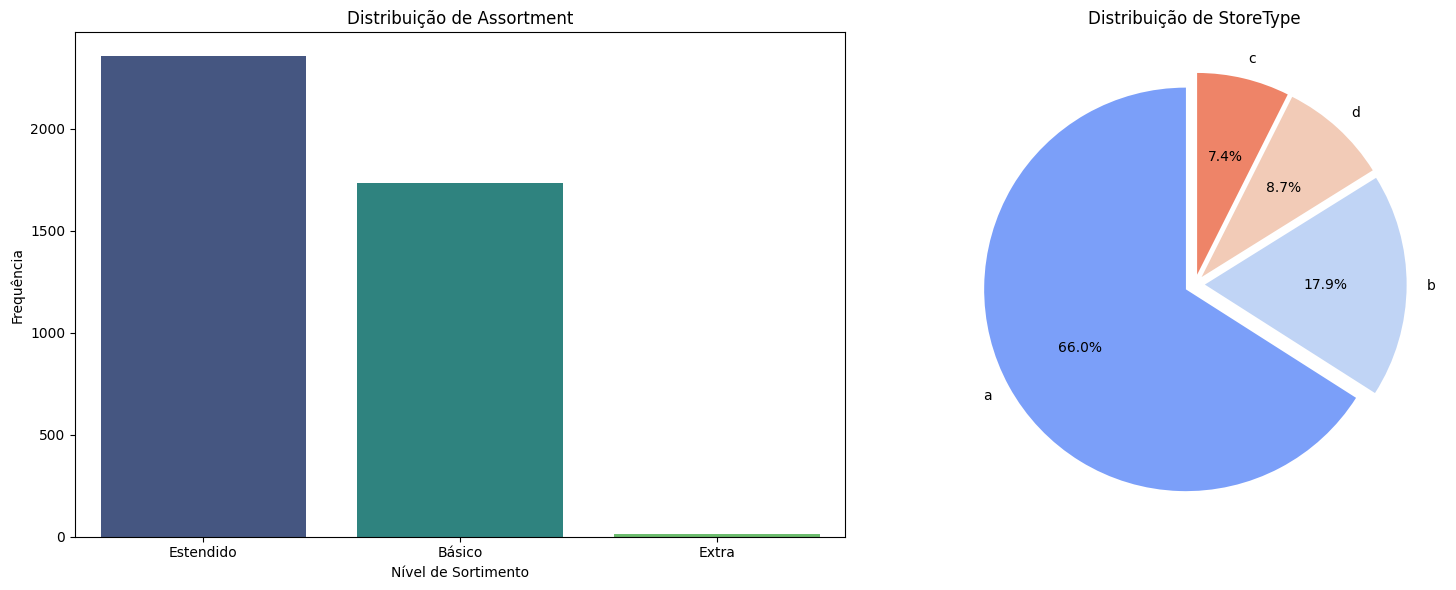

In [ ]:
# Configurando subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras - Assortment
sns.countplot(data=vendas_altas, x='Assortment', palette='viridis', ax=axes[0])
axes[0].set_title('Distribuição de Assortment')
axes[0].set_xlabel('Nível de Sortimento')
axes[0].set_ylabel('Frequência')

# Gráfico de pizza - StoreType
vendas_altas['StoreType'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm', len(vendas_altas['StoreType'].unique())),
    explode=[0.05]*len(vendas_altas['StoreType'].unique()),
    ax=axes[1]
)
axes[1].set_title('Distribuição de StoreType')
axes[1].set_ylabel('')  # Remove o rótulo do eixo Y

# Ajustando o layout
plt.tight_layout()
plt.show()

**Insights**

- Os gráficos filtrados para vendas acima de 20.000 revelam informações importantes sobre o desempenho das lojas. No gráfico de barras, observa-se que a maioria das lojas que alcançam vendas de sucesso possuem o nível de sortimento "Estendido". Isso indica que lojas com maior variedade de produtos tendem a apresentar melhores resultados de vendas. Em contrapartida, lojas com sortimento "Básico" têm menor frequência nas vendas altas, e o nível "Extra" é praticamente inexistente, sugerindo que ampliar o portfólio de produtos pode ser uma estratégia relevante para impulsionar as vendas.

- No gráfico de pizza, observa-se que 66% dos casos de sucesso nas vendas ocorrem em lojas do tipo "a", destacando o papel predominante desse formato no desempenho de vendas. Os tipos "b" e "d" têm participações menores, representando 17,9% e 8,7%, respectivamente, enquanto o tipo "c" aparece com apenas 7,4%. Esses dados sugerem que características específicas associadas às lojas do tipo "a", como localização estratégica, layout eficiente, maior capacidade de atendimento ou um público-alvo bem definido, são fatores cruciais para impulsionar o sucesso das vendas.

- Esses resultados indicam que, para melhorar o desempenho geral, a empresa pode revisar o portfólio de produtos e ampliar o sortimento em outras lojas. Além disso, é possível priorizar investimentos nas lojas do tipo "a", que mostram maior potencial de vendas, enquanto uma análise mais detalhada das lojas dos tipos "b", "c" e "d" pode ajudar a identificar barreiras de desempenho e propor melhorias estratégicas.

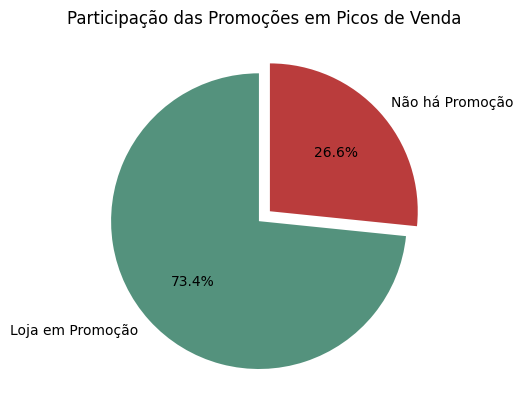

In [ ]:
plt.pie(
    vendas_altas['Promo'].value_counts(),
    labels=vendas_altas['Promo'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette(['#54927d', '#ba3c3c']),
    explode=[0.05]*len(vendas_altas['Promo'].unique()),
)

plt.title('Participação das Promoções em Picos de Venda')
plt.show()

**Insights**


- O gráfico de pizza indica que as promoções desempenham um papel crucial no sucesso das vendas. Dos dias que foram considerados picos de vendas, 73,4% ocorreram em lojas que estavam realizando promoções, enquanto apenas 26,6% dos picos aconteceram em dias sem promoções. Esse resultado reforça a ideia de que as promoções têm um impacto significativo no aumento do volume de vendas.

- Esses dados sugerem que a estratégia de promoções deve ser intensificada ou melhor direcionada, considerando que mais de dois terços das vendas de sucesso estão associadas a campanhas promocionais. Para maximizar o impacto, seria interessante avaliar a eficácia de diferentes tipos de promoções e identificar quais produtos ou períodos do ano têm maior sensibilidade a essas ações. Isso pode ajudar a empresa a planejar campanhas promocionais mais assertivas, otimizando os lucros e o volume de vendas.

In [25]:
# Ordenando os dias da semana
ordem_dias = ['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo']

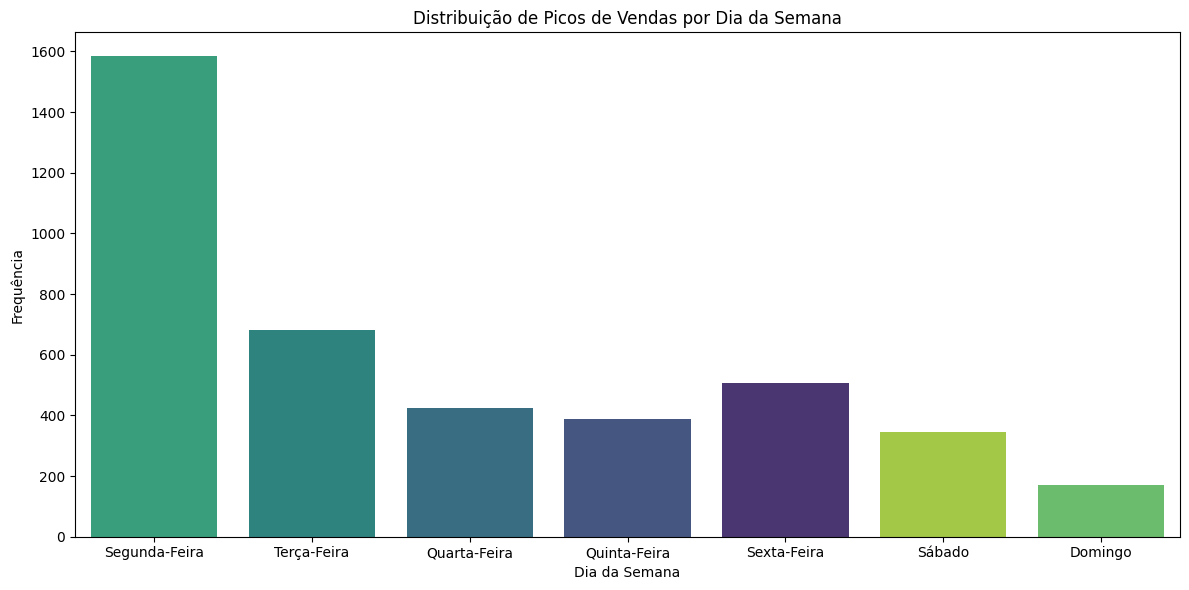

In [26]:
# Plotando o gráfico de barra
plt.figure(figsize=(12, 6))

sns.countplot(data=vendas_altas, x='DayOfWeek', palette='viridis', order=ordem_dias, hue='DayOfWeek')
plt.title('Distribuição de Picos de Vendas por Dia da Semana')
plt.ylabel("Frequência")
plt.xlabel("Dia da Semana")

plt.tight_layout()
plt.show()

**Insight**

- O gráfico mostra a distribuição dos picos de vendas ao longo dos dias da semana. Os resultados indicam que segunda-feira é o dia com o maior número de picos de vendas, representando uma concentração significativamente maior em comparação com os demais dias. Esse comportamento pode estar relacionado a fatores como o início da semana, quando clientes podem buscar renovar estoques ou aproveitar promoções lançadas no final de semana anterior.

- Outros dias da semana, como sexta-feira e terça-feira, também apresentam frequência relevante, embora substancialmente menor que a de segunda-feira. Já os dias de final de semana, especialmente domingo, possuem o menor número de picos de vendas. Esse padrão pode indicar uma oportunidade para ajustar estratégias de marketing e operações nesses dias, aumentando o fluxo de clientes e otimizando vendas em períodos com menor desempenho.

Insight Principal: A empresa pode explorar estratégias para potencializar ainda mais as vendas nas segundas-feiras, como lançamentos de promoções específicas, campanhas publicitárias direcionadas, ou reforço de estoque. Além disso, investir em ações promocionais ou eventos específicos para atrair clientes no final de semana, que apresentam menor número de picos, pode ajudar a equilibrar o desempenho ao longo da semana e maximizar os resultados.